# Imports

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# EDA

In [4]:
print(X.shape, y.shape)

(20640, 8) (20640,)


In [11]:
df = pd.DataFrame(X, columns=data.feature_names)
df['Target'] = y

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

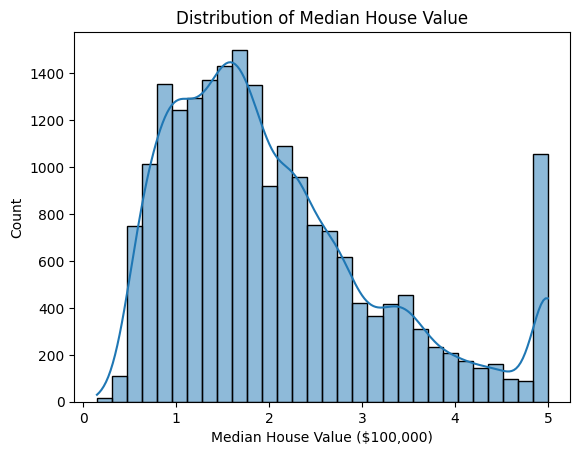

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.histplot(df['Target'], kde=True, bins=30)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000)')
plt.show()

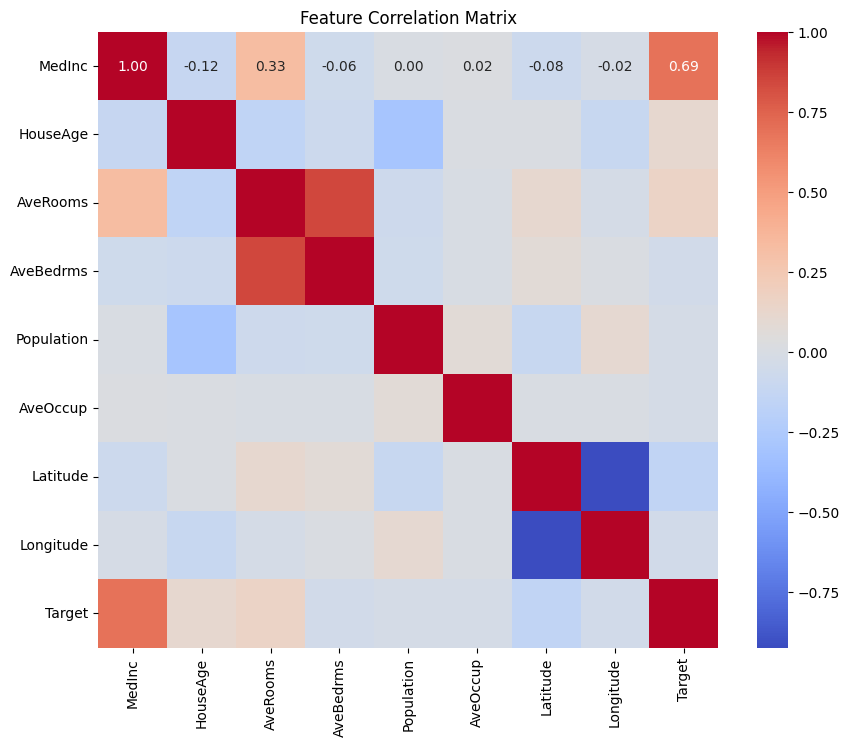

In [17]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# Training and Evaluation

## XGBoost Regressor

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred)}")

Mean Absolute Error: 0.30957335413783094


## Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
pred = model2.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred)}")

Mean Absolute Error: 0.32756900392441873


## Ridge

In [26]:
from sklearn.linear_model import Ridge

model3 = Ridge(alpha=1.0)
model3.fit(X_train, y_train)
pred = model3.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred)}")

Mean Absolute Error: 0.5332039182571575


In [30]:
import joblib

model_dir = '../../models/'
joblib.dump(model, model_dir + 'cali_house_predictor.pkl')

['../../models/cali_house_predictor.pkl']

# Gradio App

In [33]:
import gradio as gr
import pandas as pd
import joblib

model = joblib.load('../../models/cali_house_predictor.pkl')

def predict(MedInc, HouseAge, AveRooms, AvgBedrms, Population, AveOccup, Latitude, Longitude):
    prediction = model.predict([[MedInc, HouseAge, AveRooms, AvgBedrms, Population, AveOccup, Latitude, Longitude]])[0]
    return f"$ {prediction * 100000:.2f}"

inputs = [
    gr.Slider(0.5, 25, step=0.1, value=10, label='Median Income'),
    gr.Slider(0, 52, step=1, value=10, label='House Age'),
    gr.Slider(0.5, 20, step=0.1, value=6, label='Average Roooms'),
    gr.Slider(0.5, 6, step=0.1, value=1, label='Average Bedrooms'),
    gr.Slider(100, 40000, step=100, value=20000, label='Population'),
    gr.Slider(0.5, 10, step=0.1, value=6, label='Average Occupancy'),
    gr.Slider(32, 42, step=0.1, value=38, label='Latitude'),
    gr.Slider(-125, -114, step=0.1, value=-120, label='Longitude'),
]

demo = gr.Interface(
    fn=predict,
    inputs=inputs,
    outputs=gr.Textbox(label="Predicted House Price"),
    title ="California Housing Price Predictor",
)

demo.launch()
    
    

* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
